### this Jupyter notebook figures out what alpha and beta values to fit to each reservoir

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from platypus import NSGAII, Problem, Real

## Import data

In [2]:
# lower granite
lower_granite_inflow = pd.read_csv('lowergraniteinflow.csv')
lower_granite_storage = pd.read_csv('lowergranitestorage.csv')
lower_granite_outflows = pd.read_csv('lowergraniteoutflow.csv')
lower_granite_data = lower_granite_inflow.merge(lower_granite_storage, how='inner', on=['date'])
lower_granite_data = lower_granite_data.merge(lower_granite_outflows, how='inner', on=['date'])
lower_granite_data['L (unit:cfs)'] = 0 #no lower granite trib data
lower_granite_data['date'] = pd.to_datetime(lower_granite_data['date'])

# little goose
little_goose_data = pd.read_csv('littlegoosestorage.csv')
little_goose_outflows = pd.read_csv('littlegooseoutflow.csv')
little_goose_data['L (unit:cfs)'] = 0 #NO TRIB DATA FOR LITTLE GOOSE
little_goose_data = little_goose_data.merge(little_goose_outflows, how='inner', on=['date'])
little_goose_data['date'] = pd.to_datetime(little_goose_data['date'])

# lower monumental
lower_monumental_storage = pd.read_csv('lowermonumentalstorage.csv')
lower_monumental_trib = pd.read_csv('lowermontrib.csv')
lower_monumental_outflows = pd.read_csv('lowermonumentaloutflow.csv')
lower_monumental_trib['L (unit:cfs)'] = lower_monumental_trib['L (unit:cfs)'].clip(lower=0)
lower_monumental_data = lower_monumental_trib.merge(lower_monumental_storage, how='inner', on=['date'])
lower_monumental_data = lower_monumental_data.merge(lower_monumental_outflows, how='inner', on=['date'])
lower_monumental_data['date'] = pd.to_datetime(lower_monumental_data['date'])

# ice harbor
ice_harbor_storage = pd.read_csv('iceharborstorage.csv')
ice_harbor_outflow = pd.read_csv('iceharboroutflow.csv')
ice_harbor_trib = pd.read_csv('iceharbortrib.csv')
ice_harbor_outflows = pd.read_csv('iceharboroutflow.csv')
ice_harbor_trib['L (unit:cfs)'] = ice_harbor_trib['L (unit:cfs)'].clip(lower=0)
ice_harbor_data = ice_harbor_trib.merge(ice_harbor_storage, how='inner', on=['date'])
ice_harbor_data = ice_harbor_trib.merge(ice_harbor_outflows, how='inner', on=['date'])
ice_harbor_data['date'] = pd.to_datetime(ice_harbor_data['date'])

## Initialize reservoirs

In [3]:
from Reservoir4 import Reservoir

ice_harbor = Reservoir(SA=9200*4047,capacity=603000,tail_elev=339,pool_elev=446,bottom_elev=310,fish_pass=0.965, pc=106_000, spillway_cap=850_000, alfa=2.2, beta=4.9)
lower_monumental = Reservoir(SA=6590*4047,capacity=810000,tail_elev=439,pool_elev=548.3,bottom_elev=406,fish_pass=0.965, pc=130_000, spillway_cap=850_000, alfa=2.2, beta=4.9)
little_goose = Reservoir(SA=10025*4047,capacity=903000,tail_elev=539,pool_elev=646.5,bottom_elev=500,fish_pass=0.9775, pc=130_000, spillway_cap=850_000, alfa=2.2, beta=4.9)
lower_granite = Reservoir(SA=8900*4047,capacity=810000,tail_elev=636,pool_elev=746.5,bottom_elev=590,fish_pass=1, pc=130_000, spillway_cap=850_000, alfa=2.2, beta=4.9)

## Testing Lower Granite

Min: 11170
Max: 231866
Mean: 48911.7


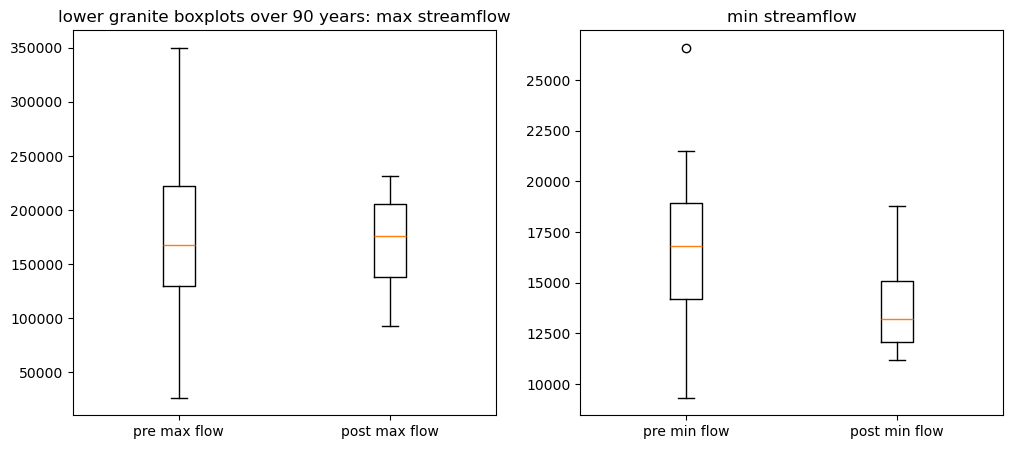

In [41]:
pre_cutoff = datetime(1970,1,1)
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_post_max = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_post_min = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lower_granite_pre_max, lower_granite_post_max], tick_labels=['pre max flow', 'post max flow'])
plt.title('lower granite boxplots over 90 years: max streamflow')

plt.subplot(1,2,2)
plt.boxplot([lower_granite_pre_min, lower_granite_post_min], tick_labels=['pre min flow', 'post min flow'])
plt.title('min streamflow')

outflows = lower_granite_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

### Flow Duration Curve

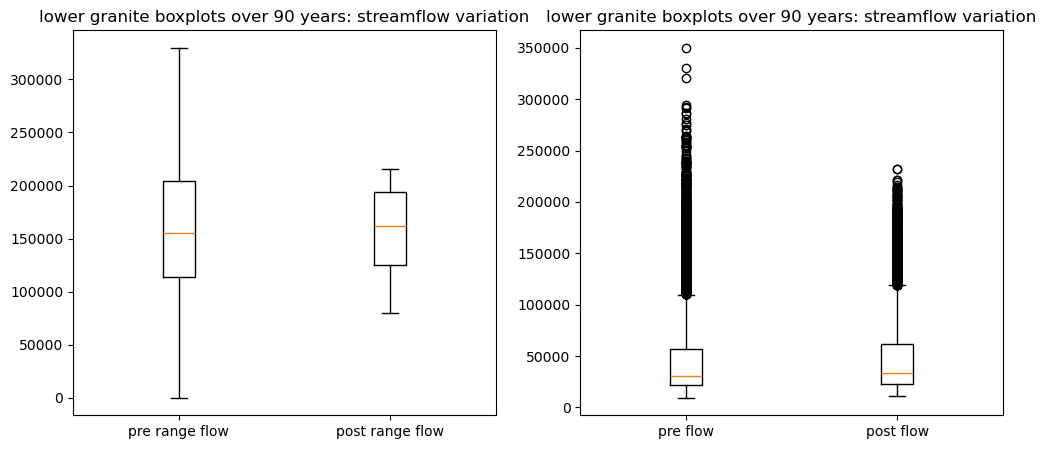

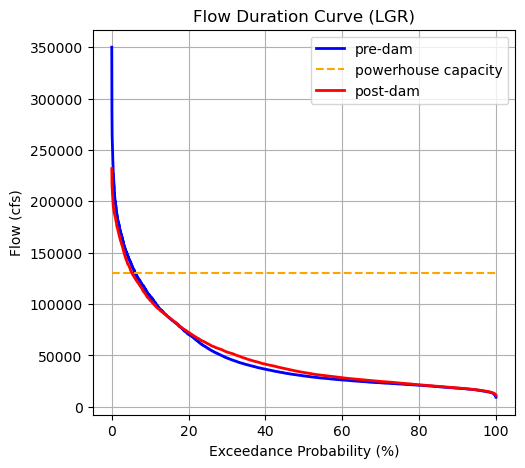

In [104]:
pre_cutoff = datetime(1970,1,1)
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].min()
lower_granite_pre_range = lower_granite_pre_max-lower_granite_pre_min

post_cutoff = datetime(1993,1,1)
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_post_max = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_post_min = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].min()
lower_granite_post_range = lower_granite_post_max-lower_granite_post_min
# display(lower_granite_pre_max)

plt.figure(1, figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot([lower_granite_pre_range, lower_granite_post_range], tick_labels=['pre range flow', 'post range flow'])
plt.title('lower granite boxplots over 90 years: streamflow variation')

plt.subplot(1,2,2)
plt.boxplot([lower_granite_pre['H (unit:cfs)'], lower_granite_post['H (unit:cfs)']], tick_labels=['pre flow', 'post flow'])
plt.title('lower granite boxplots over 90 years: streamflow variation')

pre_sorted = np.sort(np.array(lower_granite_pre['H (unit:cfs)']))[::-1]
n = len(pre_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

plt.figure(2, figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(exceedance_prob, pre_sorted, color='blue', linewidth=2, label='pre-dam')

post_sorted = np.sort(np.array(lower_granite_post['H (unit:cfs)']))[::-1]
n = len(post_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.subplot(1,2,2)
plt.hlines(130_000,0,100, color='orange', linestyles='--', label='powerhouse capacity')
plt.plot(exceedance_prob, post_sorted, color='red', linewidth=2, label='post-dam')
plt.xlabel("Exceedance Probability (%)")
plt.ylabel("Flow (cfs)")
plt.title("Flow Duration Curve (LGR)")
plt.grid(True)
plt.legend()
plt.show()

C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\1002070453.py:10: RuntimeWarning: invalid value encountered in power
  r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)
c:\Users\grcra\OneDrive\Desktop\FA25\CEE4200\project updates\columbia_river_model\Reservoir4.py:108: RuntimeWarning: invalid value encountered in power
  natural_flow = np.where(h > h0, beta * (h - h0) ** alfa, 0)


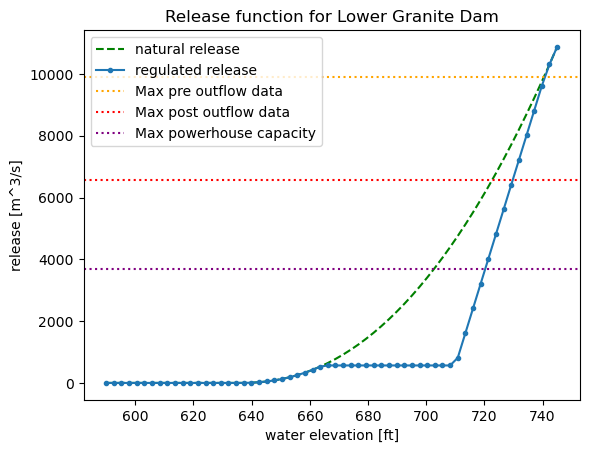

In [5]:
# Define the range of water levels
h_test = np.arange(590*0.3046, 746.5*0.3046, 0.8) # range of heights in ft

param = {'beta':4.9, 'alfa':2.2, 'h0': 636*0.3046, 'mef':20000*(0.3046**3), 'h1':710*0.3046, 'm':1000}
h0 = param['h0']
beta = param['beta']
alfa = param['alfa']

# Calculate the natural release
r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)

# calculate regulated release
r_test_reg = lower_granite.regulated_release(param, h_test)

plt.figure()
plt.plot(h_test/0.3046, r_test_nat, 'g--', label='natural release')
plt.plot(h_test/0.3046, r_test_reg, '.-', label='regulated release')
plt.axhline(350_000*0.0283, color='orange', linestyle=':', label='Max pre outflow data')
plt.axhline(231_866*0.0283, color='r', linestyle=':', label='Max post outflow data')
plt.axhline(130_000*0.0283, color='purple', linestyle=':', label='Max powerhouse capacity')
plt.xlabel('water elevation [ft]')
plt.ylabel('release [m^3/s]')
plt.title('Release function for Lower Granite Dam')
plt.legend()

<Axes: xlabel='date', ylabel='A (unit:cfs)'>

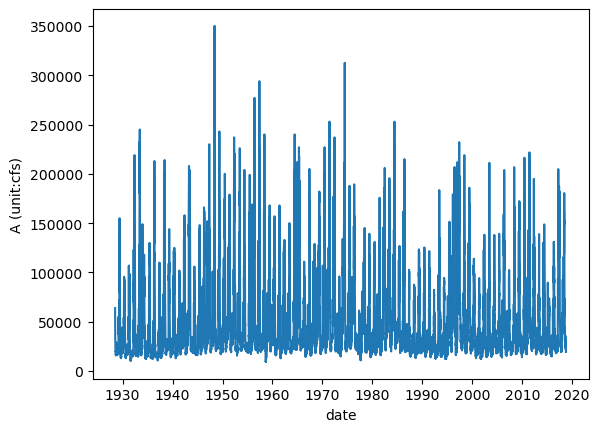

In [6]:
#plot LGR inflow
sns.lineplot(x='date', y='A (unit:cfs)', data=lower_granite_data)

Text(0.5, 1.0, 'Lower Granite outflow (regulated release function)')

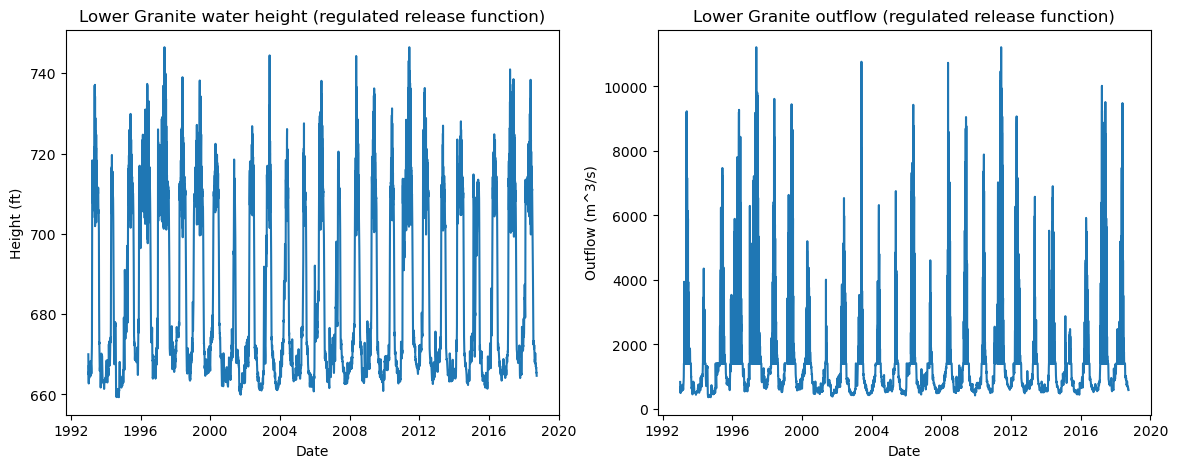

In [7]:
param = {'mef':50000*(0.3046**3), 'h1':710*0.3046, 'm':1000}
keep = 1
initial_level = 670*0.3046 # m
prev_out = lower_granite_data['A (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
tributary = lower_granite_data['L (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
inflow = (prev_out + tributary)*0.0283 # inflow, in m^3/s

storage_reg, height_reg, outflow_reg = lower_granite.simulation_reg_lake(keep, param, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], height_reg/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Lower Granite water height (regulated release function)')

plt.subplot(1,2,2)
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], outflow_reg)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Lower Granite outflow (regulated release function)')

Text(0.5, 1.0, 'Lower Granite outflow (natural release function)')

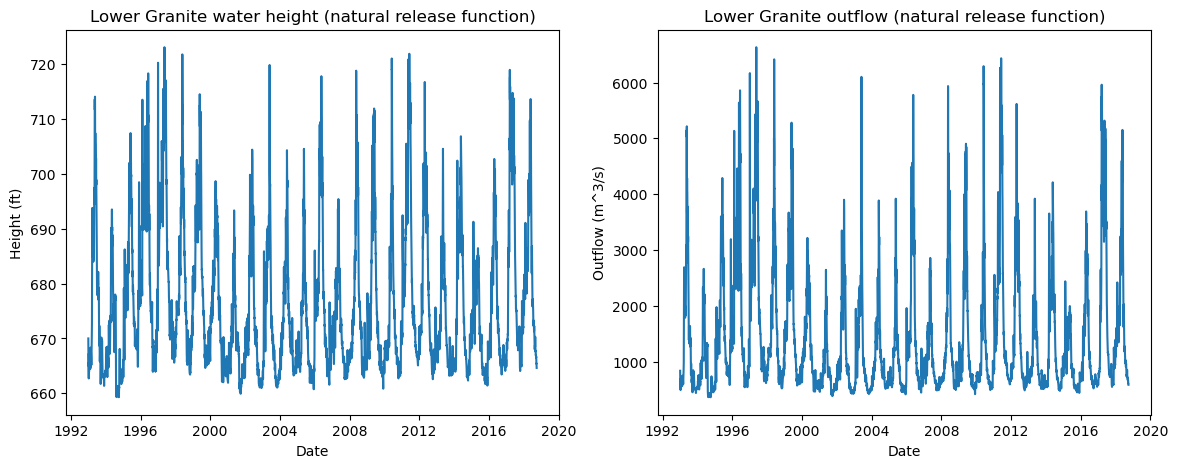

In [ ]:
keep = 1
initial_level = 670*0.3046 # m
prev_out = lower_granite_data['A (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
tributary = lower_granite_data['L (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
inflow = (prev_out + tributary)*0.0283 # inflow, in m^3/s

storage, height, outflow = lower_granite.simulation_nat_lake(keep, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], height/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Lower Granite water height (natural release function)')

plt.subplot(1,2,2)
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], outflow)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Lower Granite outflow (natural release function)')

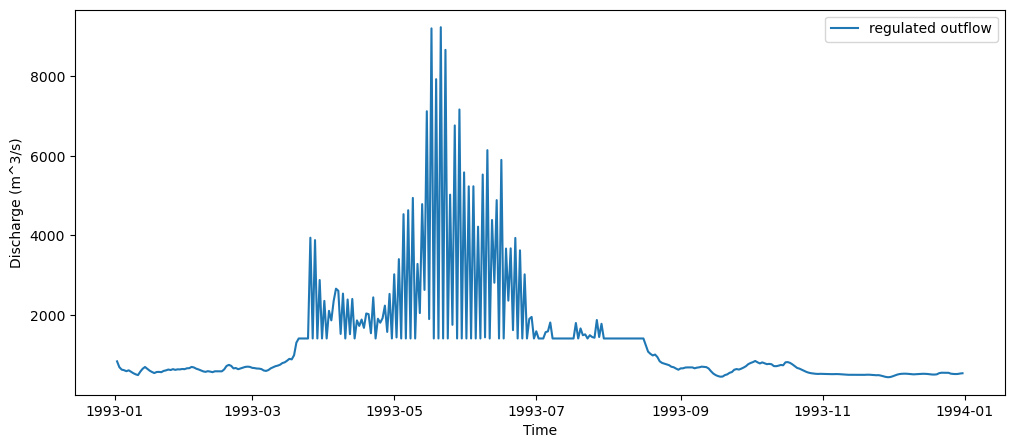

In [9]:
# a closer look at regulated outflow
plt.figure(figsize=(12,5))

plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff][:365], outflow_reg[:365], label='regulated outflow')
#plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], outflow, label='"natural" outflow')
#plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], inflow, label='inflow')

plt.xlabel('Time')
plt.ylabel('Discharge (m^3/s)')
plt.legend()

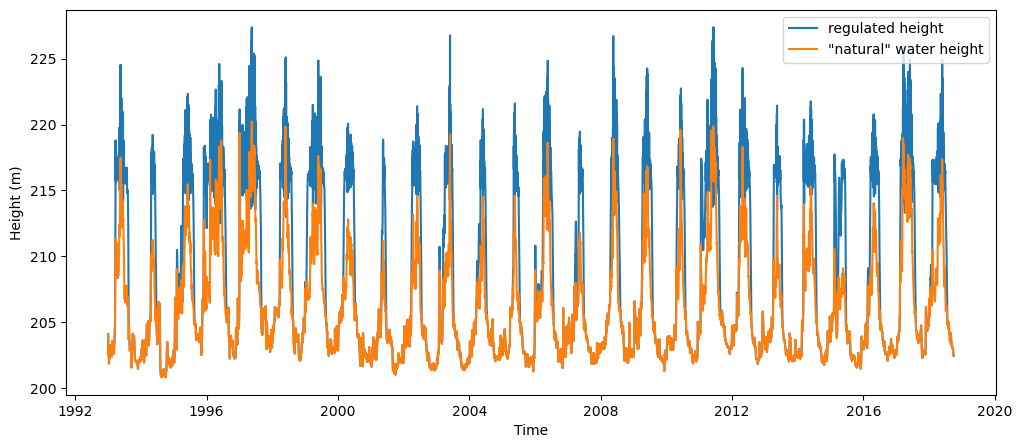

In [10]:
# a closer look at reservoir water height
plt.figure(figsize=(12,5))

plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], height_reg, label='regulated height')
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], height, label='"natural" water height')

plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.legend()

Annual hydropower production, natural: 1360.5 GWh
Annual hydropower production, regulated: 1521.7 GWh


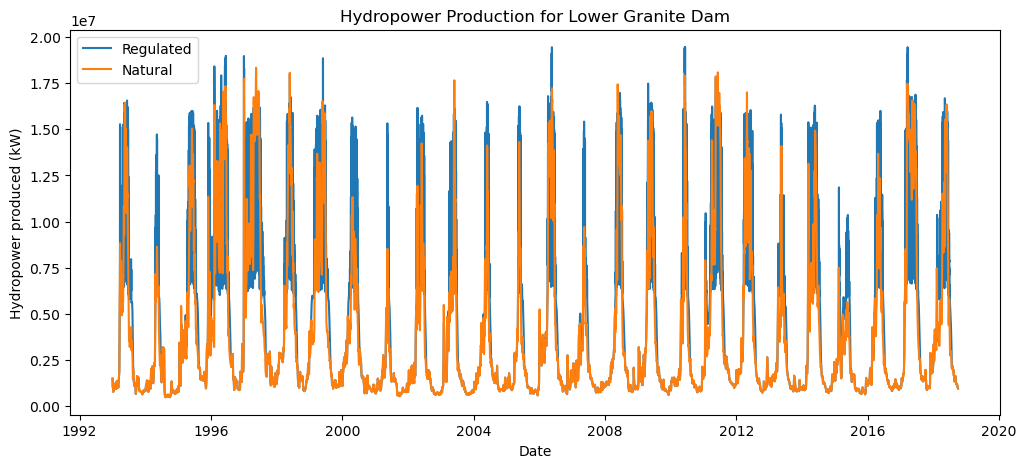

In [11]:
# test hydro function - OBJECTIVE 1
head_noreg = lower_granite.simulate_head(height)
hydro_noreg = lower_granite.simulate_hydropower(head_noreg, outflow, keep)
head_reg = lower_granite.simulate_head(height_reg)
hydro_reg = lower_granite.simulate_hydropower(head_reg, outflow_reg, keep)

plt.figure(figsize=(12,5))
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], hydro_reg, label='Regulated')
plt.plot(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], hydro_noreg, label='Natural')
plt.xlabel('Date')
plt.ylabel('Hydropower produced (kW)')
plt.legend()
plt.title('Hydropower Production for Lower Granite Dam')

annual_hydro_noreg = lower_granite.calc_avg_annual_hydro(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], hydro_noreg)
annual_hydro_reg = lower_granite.calc_avg_annual_hydro(lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff], hydro_reg)

print(f'Annual hydropower production, natural: {annual_hydro_noreg/1e6:0.1f} GWh')
print(f'Annual hydropower production, regulated: {annual_hydro_reg/1e6:0.1f} GWh')

Min: 11170
Max: 231866
Mean: 48911.7


C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\2365880492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_granite_post['Natural outflow (cfs)'] = outflow/0.0283
C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\2365880492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_granite_post['Regulated outflow (cfs)'] = outflow_reg/0.0283


Text(0.5, 0.98, 'Lower Granite Flows')

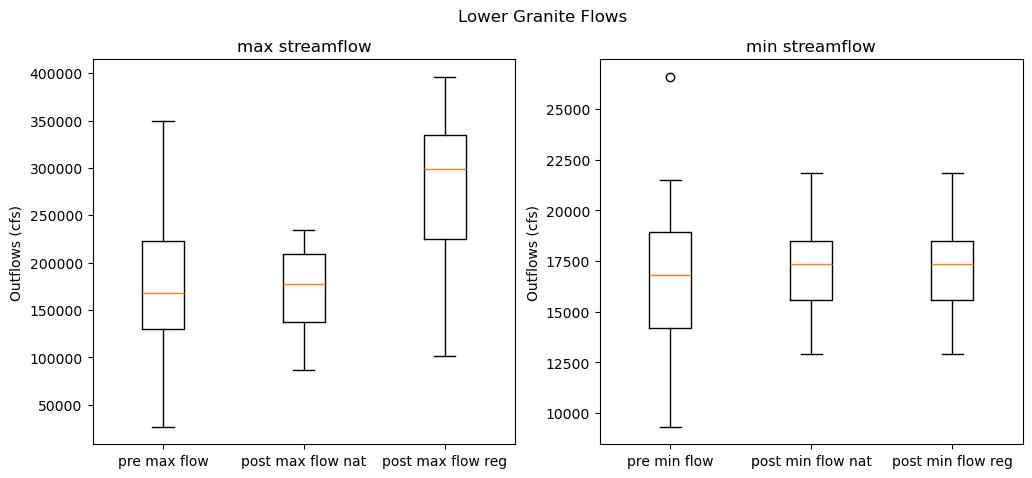

In [12]:
# test minimum flow change - OBJECTIVE 2
pre_cutoff = datetime(1970,1,1)
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_post['Natural outflow (cfs)'] = outflow/0.0283
lower_granite_post['Regulated outflow (cfs)'] = outflow_reg/0.0283
lower_granite_post_max_nat = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['Natural outflow (cfs)'].max()
lower_granite_post_min_nat = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['Natural outflow (cfs)'].min()
lower_granite_post_max_reg = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['Regulated outflow (cfs)'].max()
lower_granite_post_min_reg = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['Regulated outflow (cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lower_granite_pre_max, lower_granite_post_max_nat, lower_granite_post_max_reg], tick_labels=['pre max flow', 'post max flow nat', 'post max flow reg'])
plt.title('max streamflow')
plt.ylabel('Outflows (cfs)')

plt.subplot(1,2,2)
plt.boxplot([lower_granite_pre_min, lower_granite_post_min_nat, lower_granite_post_min_reg], tick_labels=['pre min flow', 'post min flow nat', 'post min flow reg'])
plt.title('min streamflow')
plt.ylabel('Outflows (cfs)')

outflows = lower_granite_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

plt.suptitle('Lower Granite Flows')

### FDC for simulated data (LGR)

[350000 330000 321000 ...   9470   9380   9320]


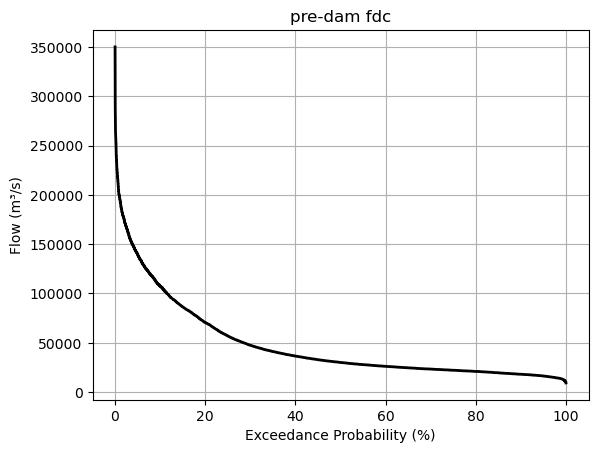

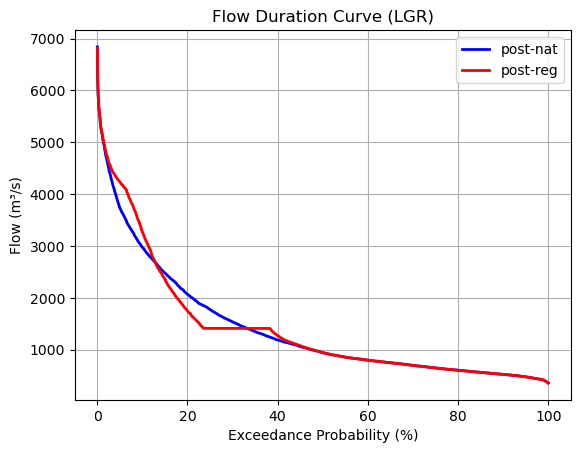

In [91]:
pre_sorted = np.sort(np.array(lower_granite_pre['H (unit:cfs)']))[::-1]
print(pre_sorted)
n = len(pre_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.figure(2, figsize=(12,5))
# plt.subplot(1,3,1)
plt.plot(exceedance_prob, pre_sorted, color='black', linewidth=2, label='pre-dam')
plt.xlabel("Exceedance Probability (%)")
plt.ylabel("Flow (m³/s)")
plt.title('pre-dam fdc')
plt.grid(True)
plt.show()

outflow_sorted = np.sort(np.array(outflow))[::-1]
n = len(outflow_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.figure(2, figsize=(12,5))
# plt.subplot(1,3,2)
plt.plot(exceedance_prob, outflow_sorted, color='blue', linewidth=2, label='post-nat')
# plt.show()

outflow_reg_sorted = np.sort(np.array(outflow_reg))[::-1]
n = len(outflow_reg_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.subplot(1,3,3)
plt.plot(exceedance_prob, outflow_reg_sorted, color='red', linewidth=2, label='post-reg')
plt.xlabel("Exceedance Probability (%)")
plt.ylabel("Flow (m³/s)")
plt.title("Flow Duration Curve (LGR)")
plt.grid(True)
plt.legend()
plt.show()

## Testing Little Goose

Min: 9200
Max: 234821
Mean: 47477.7


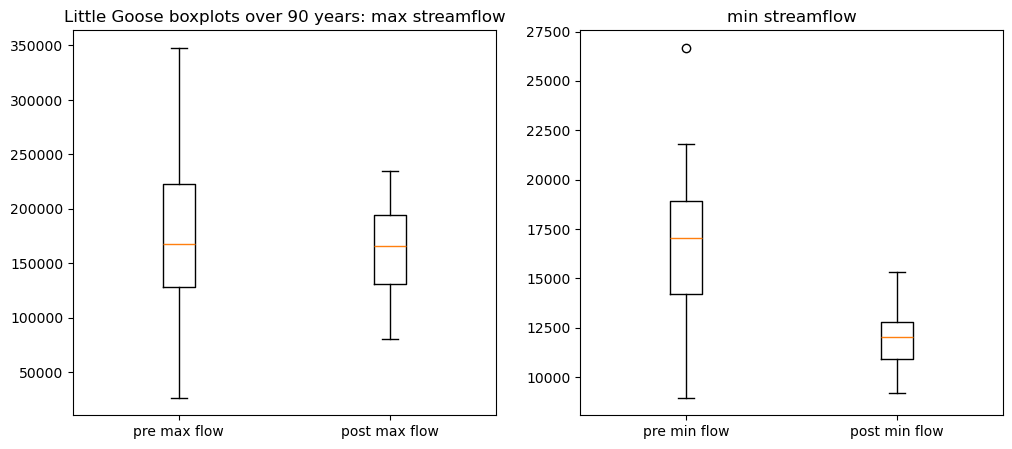

In [13]:
pre_cutoff = datetime(1970,1,1)
little_goose_pre = little_goose_data[little_goose_data['date'] <= pre_cutoff]
little_goose_pre_max = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].max()
little_goose_pre_min = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
little_goose_post = little_goose_data[little_goose_data['date'] >= post_cutoff]
little_goose_post_max = little_goose_post.groupby(little_goose_post['date'].dt.year)['H (unit:cfs)'].max()
little_goose_post_min = little_goose_post.groupby(little_goose_post['date'].dt.year)['H (unit:cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([little_goose_pre_max, little_goose_post_max], tick_labels=['pre max flow', 'post max flow'])
plt.title('Little Goose boxplots over 90 years: max streamflow')

plt.subplot(1,2,2)
plt.boxplot([little_goose_pre_min, little_goose_post_min], tick_labels=['pre min flow', 'post min flow'])
plt.title('min streamflow')

outflows = little_goose_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\1322779265.py:10: RuntimeWarning: invalid value encountered in power
  r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)
c:\Users\grcra\OneDrive\Desktop\FA25\CEE4200\project updates\columbia_river_model\Reservoir4.py:108: RuntimeWarning: invalid value encountered in power
  natural_flow = np.where(h > h0, beta * (h - h0) ** alfa, 0)


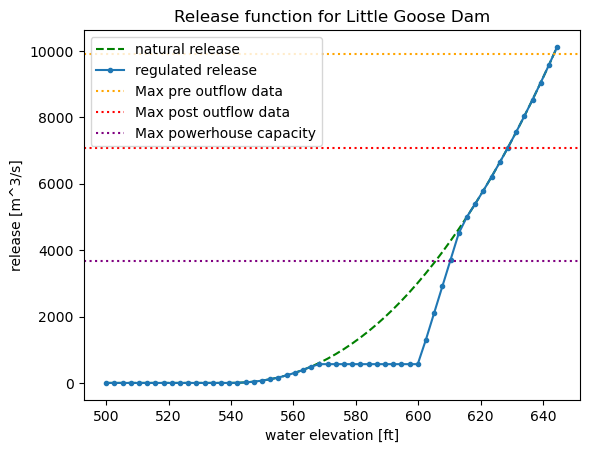

In [14]:
# Define the range of water levels
h_test = np.arange(500*0.3046, 646.5*0.3046, 0.8) # range of heights in ft

param = {'beta':4.9, 'alfa':2.2, 'h0': 539*0.3046, 'mef':20000*(0.3046**3), 'h1':600*0.3046, 'm':1000}
h0 = param['h0']
beta = param['beta']
alfa = param['alfa']

# Calculate the natural release
r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)

# calculate regulated release
r_test_reg = little_goose.regulated_release(param, h_test)

plt.figure()
plt.plot(h_test/0.3046, r_test_nat, 'g--', label='natural release')
plt.plot(h_test/0.3046, r_test_reg, '.-', label='regulated release')
plt.axhline(350_000*0.0283, color='orange', linestyle=':', label='Max pre outflow data')
plt.axhline(250_000*0.0283, color='r', linestyle=':', label='Max post outflow data')
plt.axhline(130_000*0.0283, color='purple', linestyle=':', label='Max powerhouse capacity')
plt.xlabel('water elevation [ft]')
plt.ylabel('release [m^3/s]')
plt.title('Release function for Little Goose Dam')
plt.legend()

Text(0.5, 1.0, 'Little Goose outflow (regulated release function)')

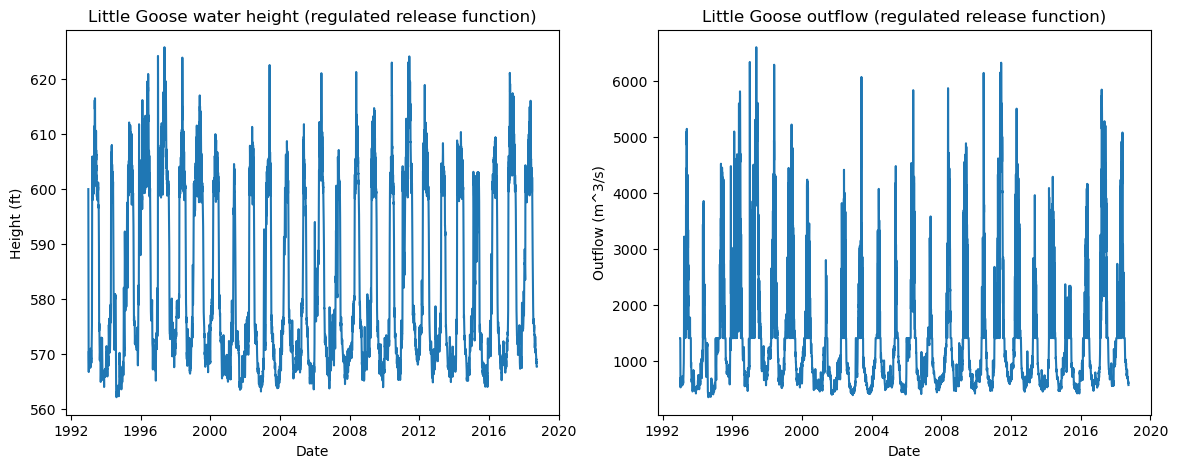

In [15]:
# Regulated simulation
param = {'mef':50000*(0.3046**3), 'h1':600*0.3046, 'm':1000}
keep = 1
initial_level = 600*0.3046 # m
prev_out = lower_granite_data['H (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
tributary = little_goose_data['L (unit:cfs)'][little_goose_data['date'] >= post_cutoff]
inflow = (prev_out + tributary)*0.0283 # inflow, in m^3/s

storage_reg, height_reg, outflow_reg = little_goose.simulation_reg_lake(keep, param, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], height_reg/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Little Goose water height (regulated release function)')

plt.subplot(1,2,2)
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], outflow_reg)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Little Goose outflow (regulated release function)')

Text(0.5, 1.0, 'Little Goose outflow (natural release function)')

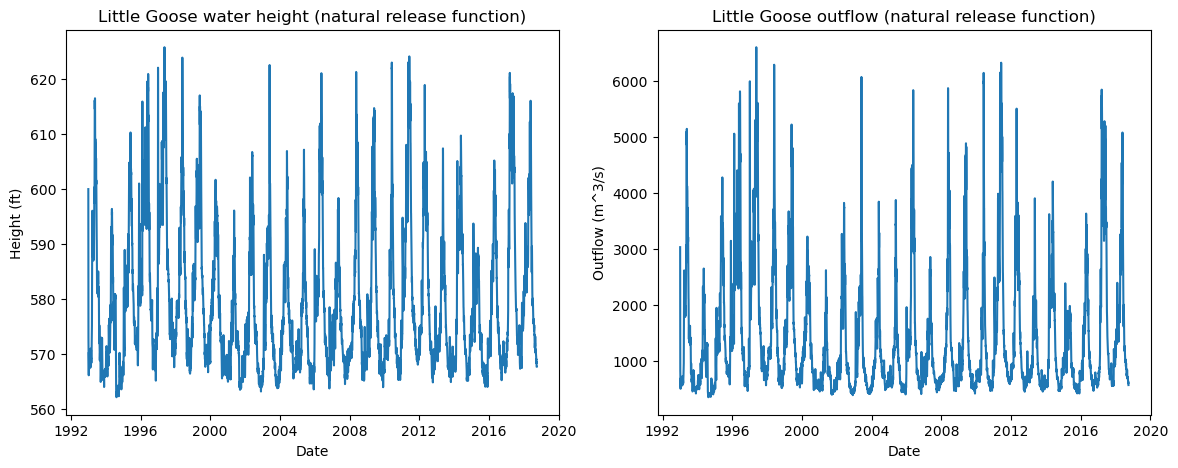

In [16]:
# Natural simulation
storage, height, outflow = little_goose.simulation_nat_lake(keep, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], height/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Little Goose water height (natural release function)')

plt.subplot(1,2,2)
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], outflow)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Little Goose outflow (natural release function)')

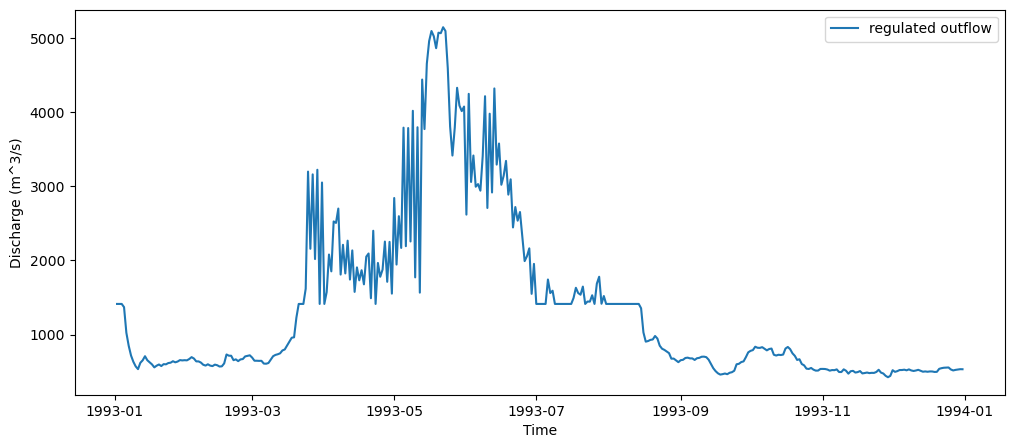

In [17]:
# a closer look at regulated outflow
plt.figure(figsize=(12,5))
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff][:365], outflow_reg[:365], label='regulated outflow')
plt.xlabel('Time')
plt.ylabel('Discharge (m^3/s)')
plt.legend()

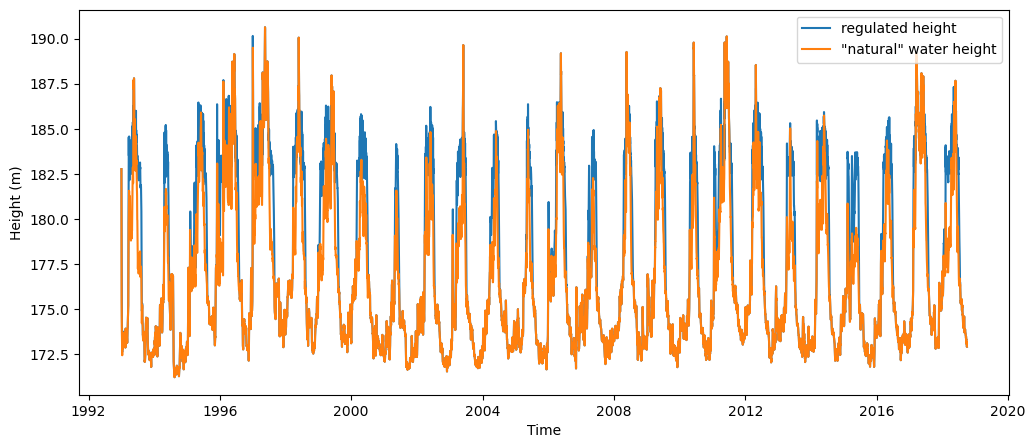

In [18]:
# a closer look at reservoir water height
plt.figure(figsize=(12,5))
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], height_reg, label='regulated height')
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], height, label='"natural" water height')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.legend()

Annual hydropower production, natural: 1361.3 GWh
Annual hydropower production, regulated: 1472.8 GWh


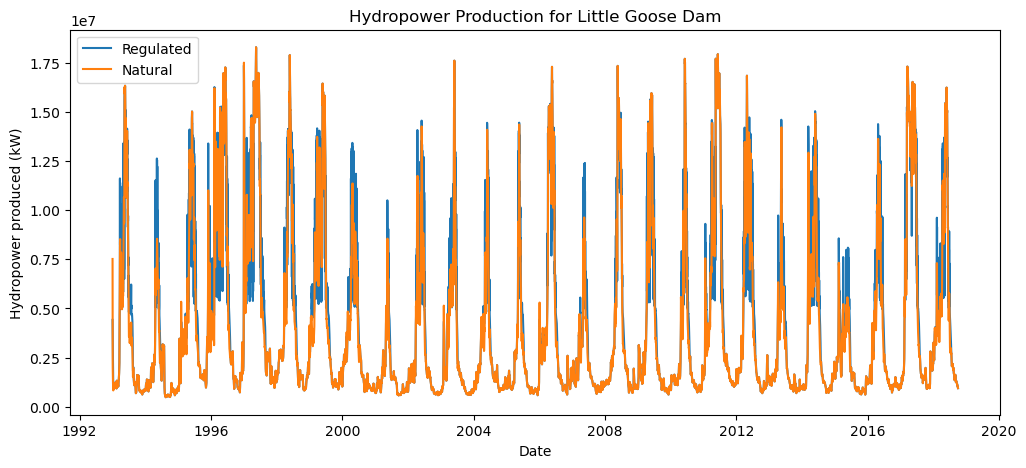

In [19]:
# test hydro function - OBJECTIVE 1
head_noreg = little_goose.simulate_head(height)
hydro_noreg = little_goose.simulate_hydropower(head_noreg, outflow, keep)
head_reg = little_goose.simulate_head(height_reg)
hydro_reg = little_goose.simulate_hydropower(head_reg, outflow_reg, keep)

plt.figure(figsize=(12,5))
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], hydro_reg, label='Regulated')
plt.plot(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], hydro_noreg, label='Natural')
plt.xlabel('Date')
plt.ylabel('Hydropower produced (kW)')
plt.legend()
plt.title('Hydropower Production for Little Goose Dam')

annual_hydro_noreg = little_goose.calc_avg_annual_hydro(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], hydro_noreg)
annual_hydro_reg = little_goose.calc_avg_annual_hydro(little_goose_data['date'][little_goose_data['date'] >= post_cutoff], hydro_reg)

print(f'Annual hydropower production, natural: {annual_hydro_noreg/1e6:0.1f} GWh')
print(f'Annual hydropower production, regulated: {annual_hydro_reg/1e6:0.1f} GWh')

Min: 9200
Max: 234821
Mean: 47477.7


C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\2291923411.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  little_goose_post['Natural outflow (cfs)'] = outflow/0.0283
C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\2291923411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  little_goose_post['Regulated outflow (cfs)'] = outflow_reg/0.0283


Text(0.5, 0.98, 'Little Goose Flows')

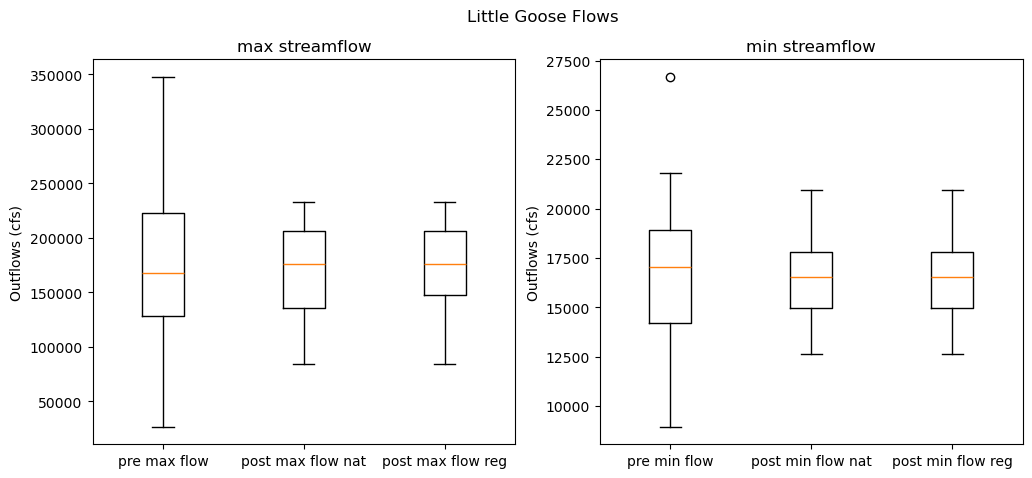

In [20]:
# test minimum flow change - OBJECTIVE 2
pre_cutoff = datetime(1970,1,1)
little_goose_pre = little_goose_data[little_goose_data['date'] <= pre_cutoff]
little_goose_pre_max = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].max()
little_goose_pre_min = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
little_goose_post = little_goose_data[little_goose_data['date'] >= post_cutoff]
little_goose_post['Natural outflow (cfs)'] = outflow/0.0283
little_goose_post['Regulated outflow (cfs)'] = outflow_reg/0.0283
little_goose_post_max_nat = little_goose_post.groupby(little_goose_post['date'].dt.year)['Natural outflow (cfs)'].max()
little_goose_post_min_nat = little_goose_post.groupby(little_goose_post['date'].dt.year)['Natural outflow (cfs)'].min()
little_goose_post_max_reg = little_goose_post.groupby(little_goose_post['date'].dt.year)['Regulated outflow (cfs)'].max()
little_goose_post_min_reg = little_goose_post.groupby(little_goose_post['date'].dt.year)['Regulated outflow (cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([little_goose_pre_max, little_goose_post_max_nat, little_goose_post_max_reg], tick_labels=['pre max flow', 'post max flow nat', 'post max flow reg'])
plt.title('max streamflow')
plt.ylabel('Outflows (cfs)')

plt.subplot(1,2,2)
plt.boxplot([little_goose_pre_min, little_goose_post_min_nat, little_goose_post_min_reg], tick_labels=['pre min flow', 'post min flow nat', 'post min flow reg'])
plt.title('min streamflow')
plt.ylabel('Outflows (cfs)')

outflows = little_goose_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

plt.suptitle('Little Goose Flows')

### FDC for LGO simulations

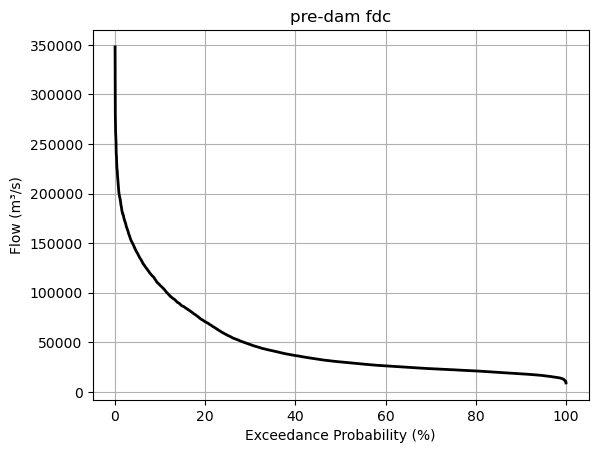

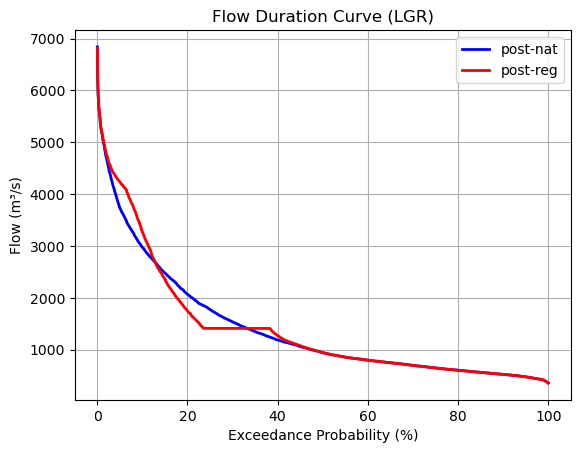

In [92]:
pre_sorted = np.sort(np.array(little_goose_pre['H (unit:cfs)']))[::-1]
n = len(pre_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.figure(2, figsize=(12,5))
# plt.subplot(1,3,1)
plt.plot(exceedance_prob, pre_sorted, color='black', linewidth=2, label='pre-dam')
plt.xlabel("Exceedance Probability (%)")
plt.ylabel("Flow (m³/s)")
plt.title('pre-dam fdc')
plt.grid(True)
plt.show()

outflow_sorted = np.sort(np.array(outflow))[::-1]
n = len(outflow_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.figure(2, figsize=(12,5))
# plt.subplot(1,3,2)
plt.plot(exceedance_prob, outflow_sorted, color='blue', linewidth=2, label='post-nat')
# plt.show()

outflow_reg_sorted = np.sort(np.array(outflow_reg))[::-1]
n = len(outflow_reg_sorted)
exceedance_prob = (np.arange(1,n+1) / (n+1)) *100

# plt.subplot(1,3,3)
plt.plot(exceedance_prob, outflow_reg_sorted, color='red', linewidth=2, label='post-reg')
plt.xlabel("Exceedance Probability (%)")
plt.ylabel("Flow (m³/s)")
plt.title("Flow Duration Curve (LGR)")
plt.grid(True)
plt.legend()
plt.show()

## Testing Lower Monumental


Min: 9400
Max: 238726
Mean: 48726.5


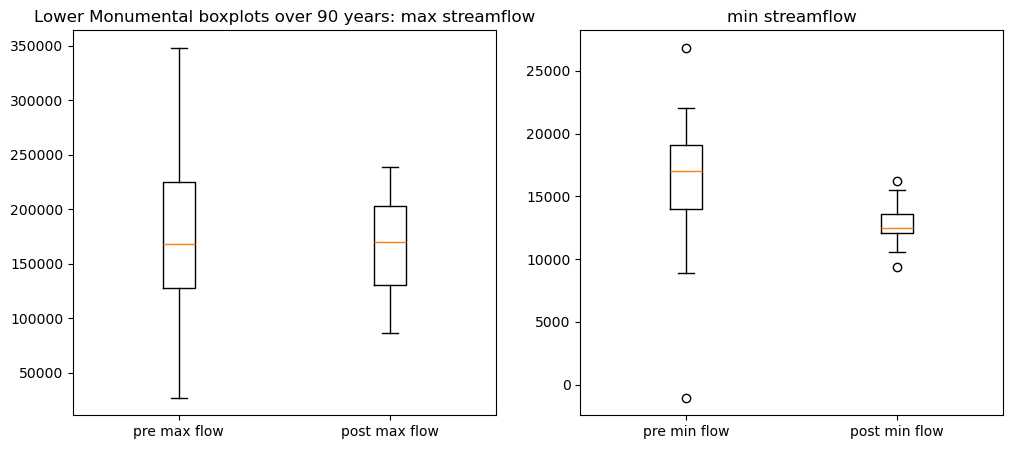

In [21]:
pre_cutoff = datetime(1970,1,1)
lower_monumental_pre = lower_monumental_data[lower_monumental_data['date'] <= pre_cutoff]
lower_monumental_pre_max = lower_monumental_pre.groupby(lower_monumental_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_monumental_pre_min = lower_monumental_pre.groupby(lower_monumental_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
lower_monumental_post = lower_monumental_data[lower_monumental_data['date'] >= post_cutoff]
lower_monumental_post_max = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['H (unit:cfs)'].max()
lower_monumental_post_min = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['H (unit:cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lower_monumental_pre_max, lower_monumental_post_max], tick_labels=['pre max flow', 'post max flow'])
plt.title('Lower Monumental boxplots over 90 years: max streamflow')

plt.subplot(1,2,2)
plt.boxplot([lower_monumental_pre_min, lower_monumental_post_min], tick_labels=['pre min flow', 'post min flow'])
plt.title('min streamflow')

outflows = lower_monumental_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\1646376804.py:10: RuntimeWarning: invalid value encountered in power
  r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)
c:\Users\grcra\OneDrive\Desktop\FA25\CEE4200\project updates\columbia_river_model\Reservoir4.py:108: RuntimeWarning: invalid value encountered in power
  natural_flow = np.where(h > h0, beta * (h - h0) ** alfa, 0)


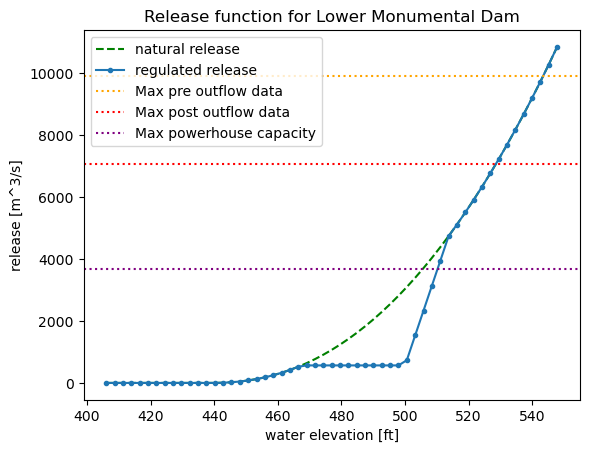

In [22]:
# Define the range of water levels
h_test = np.arange(406*0.3046, 548.3*0.3046, 0.8) # range of heights in ft

param = {'beta':4.9, 'alfa':2.2, 'h0': 439*0.3046, 'mef':20000*(0.3046**3), 'h1':500*0.3046, 'm':1000}
h0 = param['h0']
beta = param['beta']
alfa = param['alfa']

# Calculate the natural release
r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)

# calculate regulated release
r_test_reg = lower_monumental.regulated_release(param, h_test)

plt.figure()
plt.plot(h_test/0.3046, r_test_nat, 'g--', label='natural release')
plt.plot(h_test/0.3046, r_test_reg, '.-', label='regulated release')
plt.axhline(350_000*0.0283, color='orange', linestyle=':', label='Max pre outflow data')
plt.axhline(250_000*0.0283, color='r', linestyle=':', label='Max post outflow data')
plt.axhline(130_000*0.0283, color='purple', linestyle=':', label='Max powerhouse capacity')
plt.xlabel('water elevation [ft]')
plt.ylabel('release [m^3/s]')
plt.title('Release function for Lower Monumental Dam')
plt.legend()

Text(0.5, 1.0, 'Lower Monumental outflow (regulated release function)')

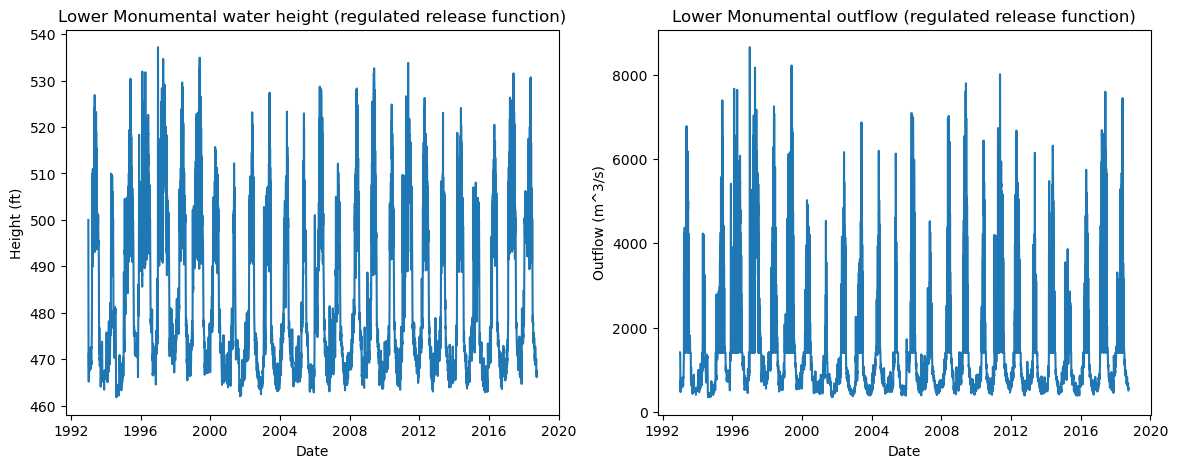

In [23]:
# Regulated simulation
param = {'mef':50000*(0.3046**3), 'h1':500*0.3046, 'm':1000}
keep = 1
initial_level = 500*0.3046 # m
prev_out = little_goose_data['H (unit:cfs)'][little_goose_data['date'] >= post_cutoff]
tributary = lower_monumental_data['L (unit:cfs)'][lower_monumental_data['date'] >= post_cutoff]
inflow = (prev_out + tributary)*0.0283 # inflow, in m^3/s

storage_reg, height_reg, outflow_reg = lower_monumental.simulation_reg_lake(keep, param, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], height_reg/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Lower Monumental water height (regulated release function)')

plt.subplot(1,2,2)
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], outflow_reg)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Lower Monumental outflow (regulated release function)')

Text(0.5, 1.0, 'Lower Monumental outflow (natural release function)')

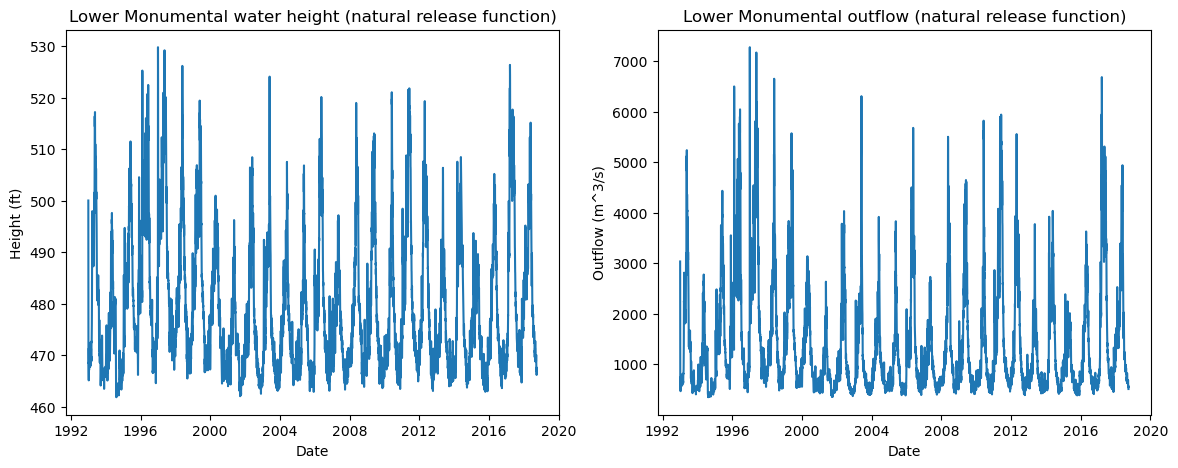

In [24]:
# Natural simulation
storage, height, outflow = lower_monumental.simulation_nat_lake(keep, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], height/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Lower Monumental water height (natural release function)')

plt.subplot(1,2,2)
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], outflow)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Lower Monumental outflow (natural release function)')

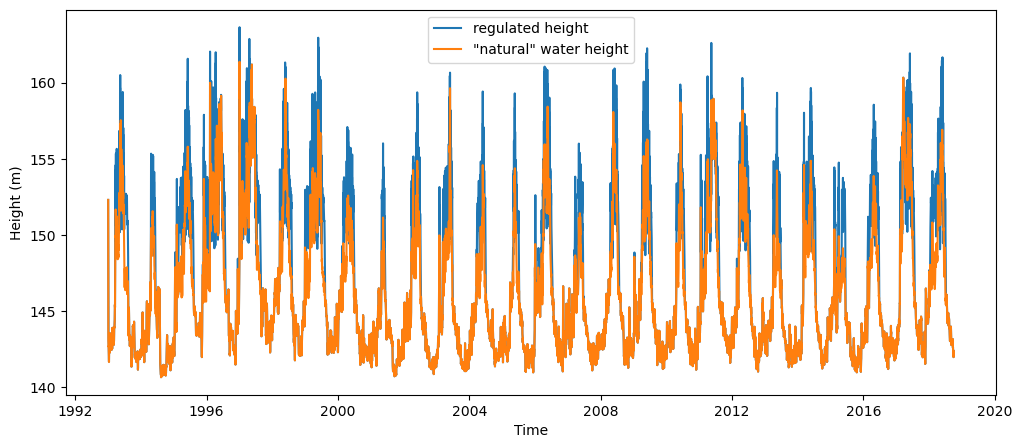

In [25]:
# a closer look at reservoir water height
plt.figure(figsize=(12,5))
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], height_reg, label='regulated height')
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], height, label='"natural" water height')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.legend()

Annual hydropower production, natural: 1356.1 GWh
Annual hydropower production, regulated: 1356.9 GWh


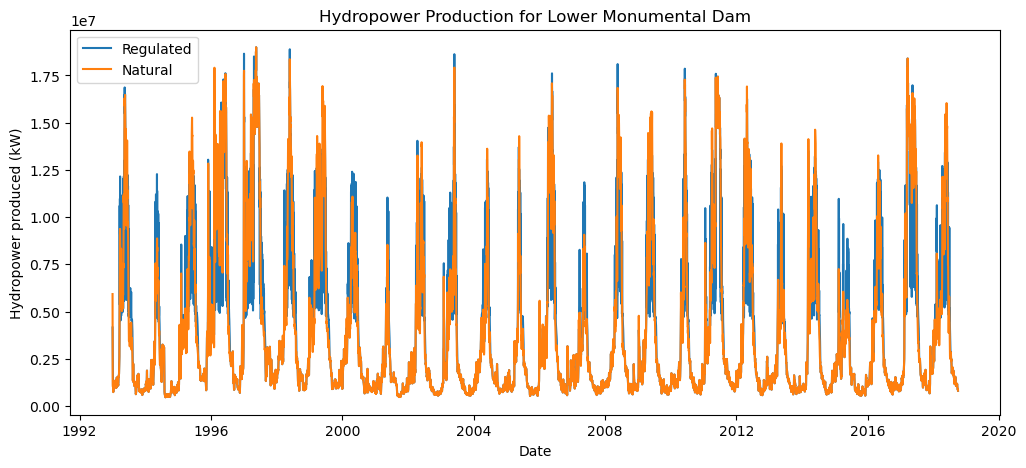

In [26]:
# test hydro function - OBJECTIVE 1
head_noreg = lower_monumental.simulate_head(height)
hydro_noreg = lower_monumental.simulate_hydropower(head_noreg, outflow, keep)
head_reg = lower_monumental.simulate_head(height_reg)
hydro_reg = lower_monumental.simulate_hydropower(head_reg, outflow_reg, keep)

plt.figure(figsize=(12,5))
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], hydro_reg, label='Regulated')
plt.plot(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], hydro_noreg, label='Natural')
plt.xlabel('Date')
plt.ylabel('Hydropower produced (kW)')
plt.legend()
plt.title('Hydropower Production for Lower Monumental Dam')

annual_hydro_noreg = lower_monumental.calc_avg_annual_hydro(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], hydro_noreg)
annual_hydro_reg = lower_monumental.calc_avg_annual_hydro(lower_monumental_data['date'][lower_monumental_data['date'] >= post_cutoff], hydro_reg)

print(f'Annual hydropower production, natural: {annual_hydro_noreg/1e6:0.1f} GWh')
print(f'Annual hydropower production, regulated: {annual_hydro_reg/1e6:0.1f} GWh')

Min: 9400
Max: 238726
Mean: 48726.5


C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\3087699685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_monumental_post['Natural outflow (cfs)'] = outflow/0.0283
C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\3087699685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_monumental_post['Regulated outflow (cfs)'] = outflow_reg/0.0283


Text(0.5, 0.98, 'Lower Monumental Flows')

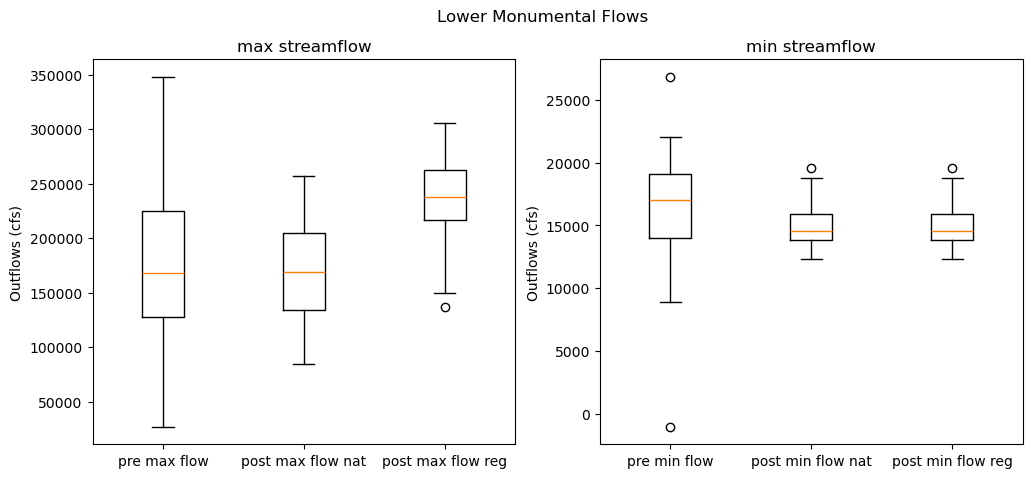

In [27]:
# test minimum flow change - OBJECTIVE 2
pre_cutoff = datetime(1970,1,1)
lower_monumental_pre = lower_monumental_data[lower_monumental_data['date'] <= pre_cutoff]
lower_monumental_pre_max = lower_monumental_pre.groupby(lower_monumental_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_monumental_pre_min = lower_monumental_pre.groupby(lower_monumental_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
lower_monumental_post = lower_monumental_data[lower_monumental_data['date'] >= post_cutoff]
lower_monumental_post['Natural outflow (cfs)'] = outflow/0.0283
lower_monumental_post['Regulated outflow (cfs)'] = outflow_reg/0.0283
lower_monumental_post_max_nat = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['Natural outflow (cfs)'].max()
lower_monumental_post_min_nat = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['Natural outflow (cfs)'].min()
lower_monumental_post_max_reg = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['Regulated outflow (cfs)'].max()
lower_monumental_post_min_reg = lower_monumental_post.groupby(lower_monumental_post['date'].dt.year)['Regulated outflow (cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lower_monumental_pre_max, lower_monumental_post_max_nat, lower_monumental_post_max_reg], tick_labels=['pre max flow', 'post max flow nat', 'post max flow reg'])
plt.title('max streamflow')
plt.ylabel('Outflows (cfs)')

plt.subplot(1,2,2)
plt.boxplot([lower_monumental_pre_min, lower_monumental_post_min_nat, lower_monumental_post_min_reg], tick_labels=['pre min flow', 'post min flow nat', 'post min flow reg'])
plt.title('min streamflow')
plt.ylabel('Outflows (cfs)')

outflows = lower_monumental_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

plt.suptitle('Lower Monumental Flows')


## Testing Ice Harbor


Min: 7900
Max: 228000
Mean: 49041.9


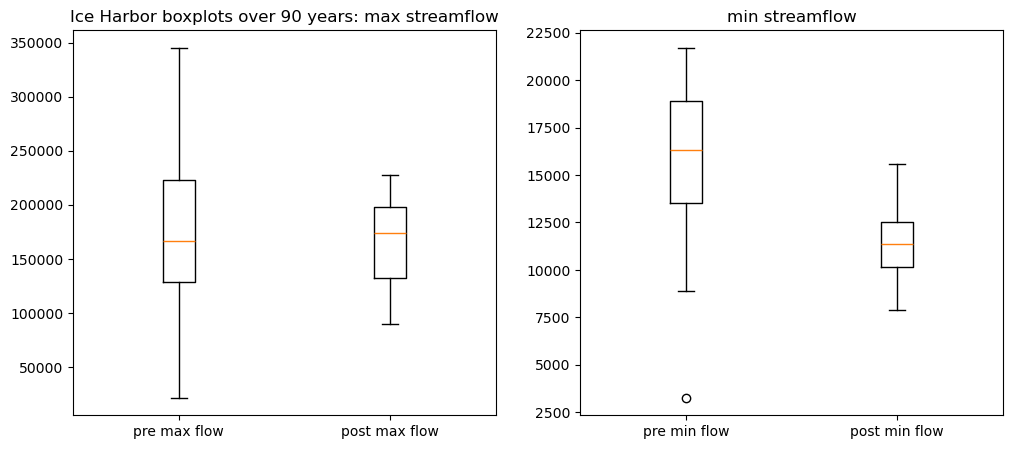

In [28]:
pre_cutoff = datetime(1970,1,1)
ice_harbor_pre = ice_harbor_data[ice_harbor_data['date'] <= pre_cutoff]
ice_harbor_pre_max = ice_harbor_pre.groupby(ice_harbor_pre['date'].dt.year)['H (unit:cfs)'].max()
ice_harbor_pre_min = ice_harbor_pre.groupby(ice_harbor_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
ice_harbor_post = ice_harbor_data[ice_harbor_data['date'] >= post_cutoff]
ice_harbor_post_max = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['H (unit:cfs)'].max()
ice_harbor_post_min = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['H (unit:cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([ice_harbor_pre_max, ice_harbor_post_max], tick_labels=['pre max flow', 'post max flow'])
plt.title('Ice Harbor boxplots over 90 years: max streamflow')

plt.subplot(1,2,2)
plt.boxplot([ice_harbor_pre_min, ice_harbor_post_min], tick_labels=['pre min flow', 'post min flow'])
plt.title('min streamflow')

outflows = ice_harbor_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\1833614625.py:10: RuntimeWarning: invalid value encountered in power
  r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)
c:\Users\grcra\OneDrive\Desktop\FA25\CEE4200\project updates\columbia_river_model\Reservoir4.py:108: RuntimeWarning: invalid value encountered in power
  natural_flow = np.where(h > h0, beta * (h - h0) ** alfa, 0)


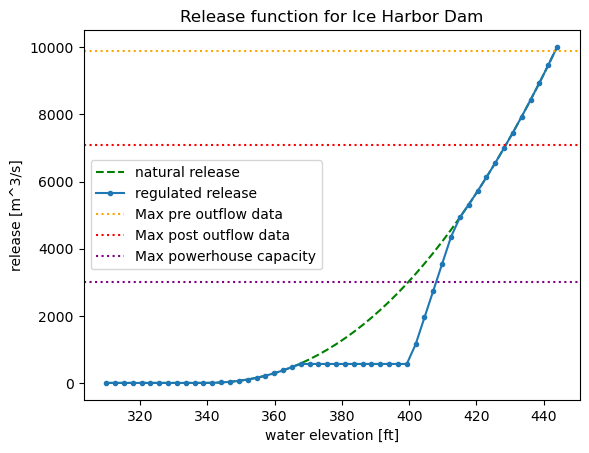

In [29]:
# Define the range of water levels
h_test = np.arange(310*0.3046, 446*0.3046, 0.8) # range of heights in ft

param = {'beta':4.9, 'alfa':2.2, 'h0': 339*0.3046, 'mef':20000*(0.3046**3), 'h1':400*0.3046, 'm':1000}
h0 = param['h0']
beta = param['beta']
alfa = param['alfa']

# Calculate the natural release
r_test_nat = np.where(h_test > h0, beta * (h_test - h0) ** alfa, 0)

# calculate regulated release
r_test_reg = ice_harbor.regulated_release(param, h_test)

plt.figure()
plt.plot(h_test/0.3046, r_test_nat, 'g--', label='natural release')
plt.plot(h_test/0.3046, r_test_reg, '.-', label='regulated release')
plt.axhline(350_000*0.0283, color='orange', linestyle=':', label='Max pre outflow data')
plt.axhline(250_000*0.0283, color='r', linestyle=':', label='Max post outflow data')
plt.axhline(106_000*0.0283, color='purple', linestyle=':', label='Max powerhouse capacity')
plt.xlabel('water elevation [ft]')
plt.ylabel('release [m^3/s]')
plt.title('Release function for Ice Harbor Dam')
plt.legend()

Text(0.5, 1.0, 'Ice Harbor outflow (regulated release function)')

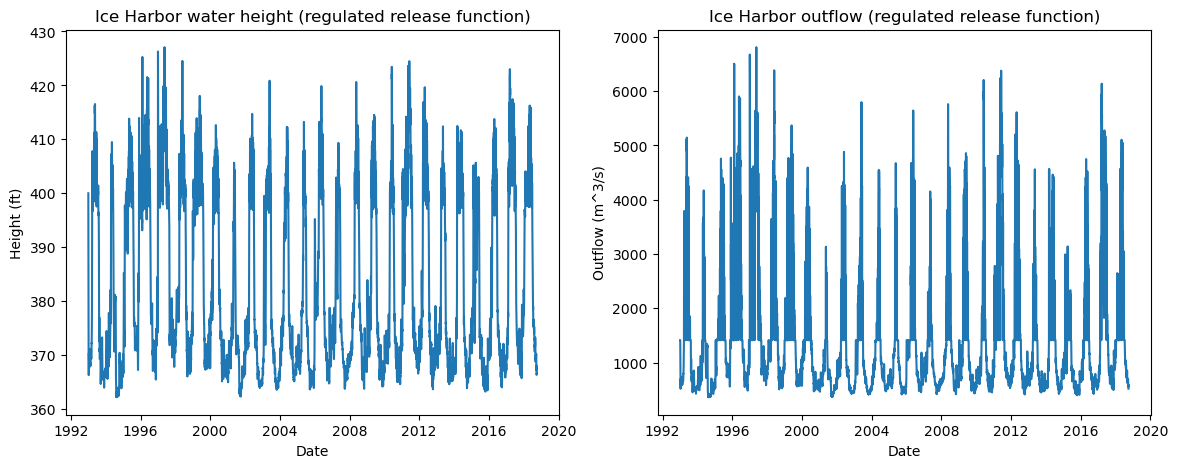

In [30]:
# Regulated simulation
param = {'mef':50000*(0.3046**3), 'h1':400*0.3046, 'm':1000}
keep = 1
initial_level = 400*0.3046 # m
prev_out = lower_monumental_data['H (unit:cfs)'][lower_monumental_data['date'] >= post_cutoff]
tributary = ice_harbor_data['L (unit:cfs)'][ice_harbor_data['date'] >= post_cutoff]
inflow = (prev_out + tributary)*0.0283 # inflow, in m^3/s

storage_reg, height_reg, outflow_reg = ice_harbor.simulation_reg_lake(keep, param, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], height_reg/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Ice Harbor water height (regulated release function)')

plt.subplot(1,2,2)
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], outflow_reg)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Ice Harbor outflow (regulated release function)')

Text(0.5, 1.0, 'Ice Harbor outflow (natural release function)')

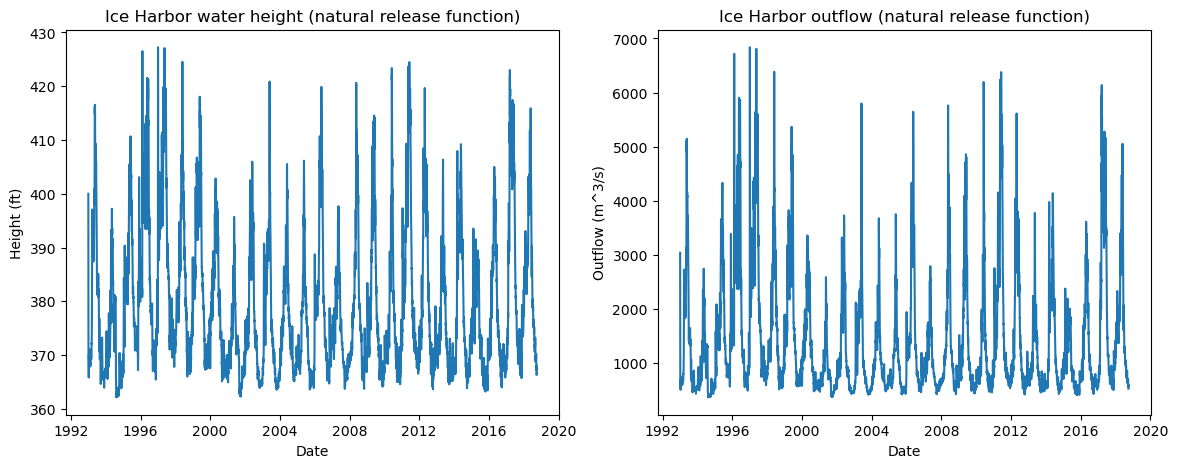

In [31]:
# Natural simulation
storage, height, outflow = ice_harbor.simulation_nat_lake(keep, initial_level, inflow.values)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], height/0.3046)
plt.xlabel('Date')
plt.ylabel('Height (ft)')
plt.title('Ice Harbor water height (natural release function)')

plt.subplot(1,2,2)
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], outflow)
plt.xlabel('Date')
plt.ylabel('Outflow (m^3/s)')
plt.title('Ice Harbor outflow (natural release function)')

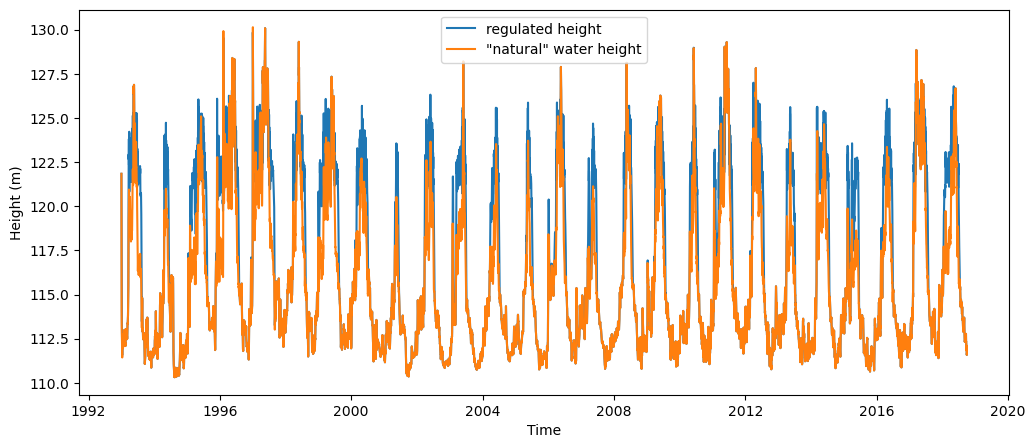

In [32]:
# a closer look at reservoir water height
plt.figure(figsize=(12,5))
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], height_reg, label='regulated height')
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], height, label='"natural" water height')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.legend()

Annual hydropower production, natural: 1305.6 GWh
Annual hydropower production, regulated: 1381.3 GWh


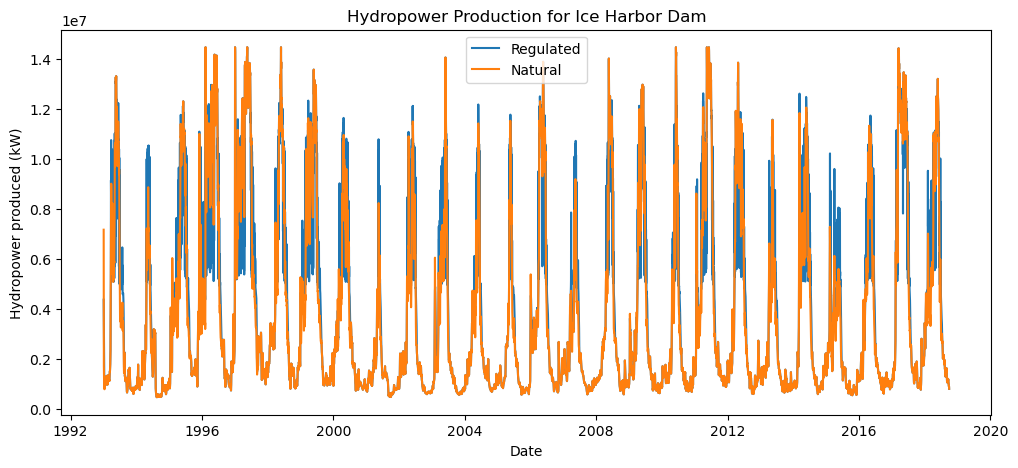

In [33]:
# test hydro function - OBJECTIVE 1
head_noreg = ice_harbor.simulate_head(height)
hydro_noreg = ice_harbor.simulate_hydropower(head_noreg, outflow, keep)
head_reg = ice_harbor.simulate_head(height_reg)
hydro_reg = ice_harbor.simulate_hydropower(head_reg, outflow_reg, keep)

plt.figure(figsize=(12,5))
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], hydro_reg, label='Regulated')
plt.plot(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], hydro_noreg, label='Natural')
plt.xlabel('Date')
plt.ylabel('Hydropower produced (kW)')
plt.legend()
plt.title('Hydropower Production for Ice Harbor Dam')

annual_hydro_noreg = ice_harbor.calc_avg_annual_hydro(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], hydro_noreg)
annual_hydro_reg = ice_harbor.calc_avg_annual_hydro(ice_harbor_data['date'][ice_harbor_data['date'] >= post_cutoff], hydro_reg)

print(f'Annual hydropower production, natural: {annual_hydro_noreg/1e6:0.1f} GWh')
print(f'Annual hydropower production, regulated: {annual_hydro_reg/1e6:0.1f} GWh')

Min: 7900
Max: 228000
Mean: 49041.9


C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\2646576089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice_harbor_post['Natural outflow (cfs)'] = outflow/0.0283
C:\Users\grcra\AppData\Local\Temp\ipykernel_46312\2646576089.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice_harbor_post['Regulated outflow (cfs)'] = outflow_reg/0.0283


Text(0.5, 0.98, 'Ice Harbor Flows')

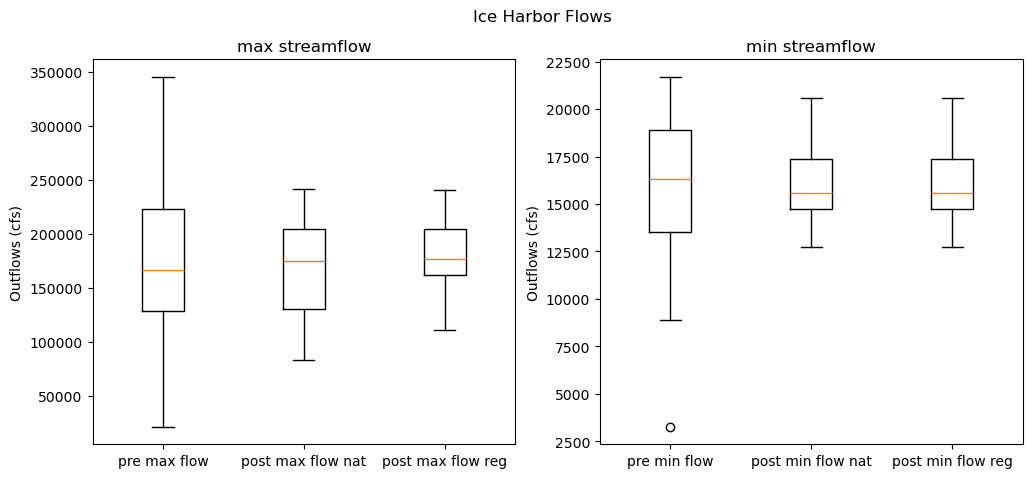

In [34]:
# test minimum flow change - OBJECTIVE 2
pre_cutoff = datetime(1970,1,1)
ice_harbor_pre = ice_harbor_data[ice_harbor_data['date'] <= pre_cutoff]
ice_harbor_pre_max = ice_harbor_pre.groupby(ice_harbor_pre['date'].dt.year)['H (unit:cfs)'].max()
ice_harbor_pre_min = ice_harbor_pre.groupby(ice_harbor_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
ice_harbor_post = ice_harbor_data[ice_harbor_data['date'] >= post_cutoff]
ice_harbor_post['Natural outflow (cfs)'] = outflow/0.0283
ice_harbor_post['Regulated outflow (cfs)'] = outflow_reg/0.0283
ice_harbor_post_max_nat = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['Natural outflow (cfs)'].max()
ice_harbor_post_min_nat = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['Natural outflow (cfs)'].min()
ice_harbor_post_max_reg = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['Regulated outflow (cfs)'].max()
ice_harbor_post_min_reg = ice_harbor_post.groupby(ice_harbor_post['date'].dt.year)['Regulated outflow (cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([ice_harbor_pre_max, ice_harbor_post_max_nat, ice_harbor_post_max_reg], tick_labels=['pre max flow', 'post max flow nat', 'post max flow reg'])
plt.title('max streamflow')
plt.ylabel('Outflows (cfs)')

plt.subplot(1,2,2)
plt.boxplot([ice_harbor_pre_min, ice_harbor_post_min_nat, ice_harbor_post_min_reg], tick_labels=['pre min flow', 'post min flow nat', 'post min flow reg'])
plt.title('min streamflow')
plt.ylabel('Outflows (cfs)')

outflows = ice_harbor_post['H (unit:cfs)']
print(f'Min: {np.min(outflows)}')
print(f'Max: {np.max(outflows)}')
print(f'Mean: {np.mean(outflows):0.1f}')

plt.suptitle('Ice Harbor Flows')


## Optimize alpha and beta values for natural release?
Objectives: get natural release max and min as close as possible to pre max flow and pre min flow. This doesn't work tho :( why did I spend so much time on it

In [35]:
#bounds for alpha and beta
alfbet = {'alpha_min':0.1, 'alpha_max':5, 'beta_min':0.1, 'beta_max':5}

In [36]:
def simulate_one_for_params(reservoir, h_in, n, alpha, beta, goal_max, goal_min, datetimes):
    # goal_max and goal_min should be in m^3/s
    # Ensure inflow is a 1-D numpy array (Reservoir.simulation_* expect array-like indexed by integers)
    if isinstance(n, (pd.Series, pd.DataFrame)):
        n_arr = n.values
    else:
        n_arr = np.asarray(n)

    reservoir.set_params(alpha, beta)

    # Run the reservoir natural simulation. Pass a numpy array for inflows.
    s, h, r = reservoir.simulation_nat_lake(1, h_in, n_arr)

    # Build a DataFrame for post-processing. Ensure datetimes is aligned and converted to datetime64
    dates = pd.to_datetime(pd.Series(datetimes)).reset_index(drop=True)
    r_series = pd.Series(r)

    if len(dates) != len(r_series):
        # Try to align by taking the first min length elements and warn the user
        minlen = min(len(dates), len(r_series))
        dates = dates.iloc[:minlen]
        r_series = r_series.iloc[:minlen]

    df = pd.DataFrame({'date': dates, 'outflows': r_series})

    # Compute annual max/min of outflows
    avg_max = np.median(df.groupby(df['date'].dt.year)['outflows'].max())
    avg_min = np.median(df.groupby(df['date'].dt.year)['outflows'].min())

    max_dev = np.abs(avg_max - goal_max)
    min_dev = np.abs(avg_min - goal_min)

    return max_dev, min_dev


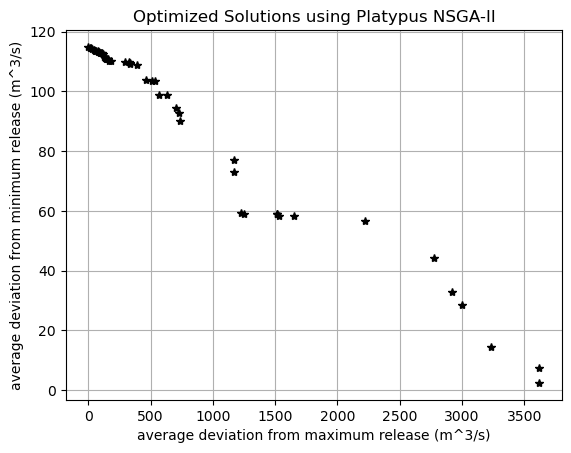

In [37]:
# %% Step 3 - Direct Policy Search with NSGA-II
# Define the optimization problem

# reservoirs have already been instantiated!!

reservoir = lower_granite
h_in = 670*0.3046
goal_max = np.median(lower_granite_post_max)*0.0285
goal_min = np.median(lower_granite_post_min)*0.0285
datetimes = lower_granite_data['date'][lower_granite_data['date'] >= post_cutoff]
prev_out = lower_granite_data['A (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
tributary = lower_granite_data['L (unit:cfs)'][lower_granite_data['date'] >= post_cutoff]
inflow = (prev_out + tributary)*0.0283 # inflow, in m^3/s

#print(simulate_one_for_params(reservoir, h_in, inflow, 2, 5, goal_max, goal_min, datetimes))

class DamOptimization(Problem):
    def __init__(self):
        # Create a problem with 2 decision variables and 2 objectives
        super(DamOptimization, self).__init__(2, 2)  # 4 decision variables (* N days), 2 objectives

        self.types[:] = (Real(alfbet['alpha_min'],alfbet['alpha_max']), Real(alfbet['beta_min'],alfbet['beta_max']))

    def evaluate(self, solutions):
        # Check if a single solution is passed
        if not isinstance(solutions, list):
            solutions = [solutions]
        
        for s in solutions:
            # Simulate the lake with current parameters
            alpha, beta = s.variables
            
            # Run the simulation function (ensure this is defined)
            max_dev, min_dev = simulate_one_for_params(reservoir, h_in, inflow, alpha, beta, goal_max, goal_min, datetimes)
            
            # Set the objectives for the solution
            s.objectives[:] = [max_dev, min_dev]

# Create the problem instance
problem = DamOptimization()

# Set up and run the algorithm
population_size = 50  # Change this to your desired population size
num_generations = 20  # Change this to your desired number of generations
total_evaluations = population_size * num_generations # Calculate total evaluations based on population size and generations
algorithm = NSGAII(problem,population_size=population_size)
algorithm.run(400)  # Run for total evaluations

# Extract results for analysis
results = np.array([[s.objectives[0], s.objectives[1]] for s in algorithm.result])

# Plot results
plt.figure()
plt.plot(results[:, 0], results[:, 1], 'k*')
plt.xlabel('average deviation from maximum release (m^3/s)')
plt.ylabel('average deviation from minimum release (m^3/s)')
plt.title('Optimized Solutions using Platypus NSGA-II')
plt.grid(True)
plt.show()

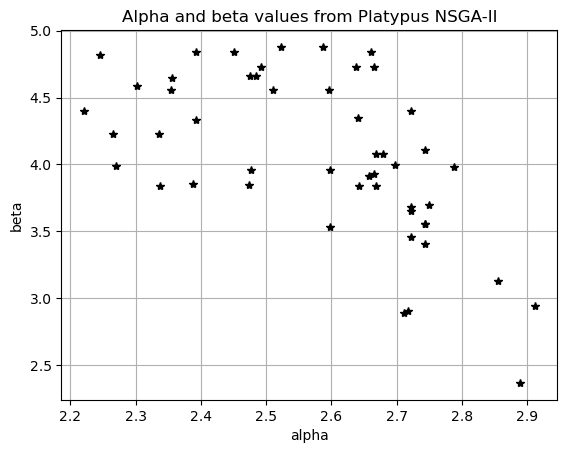

In [38]:
variabels = np.array([[s.variables[0], s.variables[1]] for s in algorithm.result])
plt.figure()
plt.plot(variabels[:, 0], variabels[:, 1], 'k*')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Alpha and beta values from Platypus NSGA-II')
plt.grid(True)
plt.show()

In [39]:
imin = np.argmin(results[:,1])
print(results[imin,1])
print(variabels[imin])

2.349671304634967
[2.78815543 3.98446315]
